# TD1 - Models of Neurons I

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## &#9317; Euler's method

In [2]:
# Global variables for the time integration, given as default values in the Euler's method algorithm.
T = 10
delta_t = 0.01

def Euler_method(f, y0, T=T, delta_t=delta_t):
    '''Numerical approximation of the solution of the differential equation dy/dt = f(y,t) by Euler's method.
    Inputs:
        f       (function)  Function of arguments (y, t) specifying the derivative of the unknown function.
        y0      (float)     Initial condition.
        T       (float)     Maximum time of integration.
        delta_t (float)     Time step, such that delta_t << T.
    Output:
        Y       (list)      List of the approximated values of the solution at the intermediary time points.
    '''
    Y = [y0] # initial condition
    for t in range(1, int(T/delta_t)): 
        y = Y[-1] + delta_t*f(Y[-1], t) # evaluation of the derivative function with the approximated value at the previous time point
        Y.append(y)
    return Y

**Approximation of four test differential equations.**  

Initial conditions are specified in the dictionary `INIT_COND`.  

The results of the computations will be stored in the dictionary `̀APPROX`.  

String expressions of the differential equations (for plotting) are contained in the dictionary `INIT_COND`.  

In [3]:
def f1(y, t):
    return t

def f2(y, t):
    return -y

def f3(y, t, c0=2):
    return -y + c0

def f4(y, t, omega=1/10):
    return -y + np.cos(omega*t)

# Global dictionaries
INIT_COND = {f1:0, f2:2, f3:3, f4:0} # initial conditions
APPROX = {f1:[], f2:[], f3:[], f4:[]} # results of the approximation 
FORMULAS = {f1:r'$t$', f2:r'$-y$', f3:r'$-y+c_0$', f4:r'$-y + \cos(\omega t)$'} # expressions of the differential equation

In [4]:
for f in APPROX.keys():
    Y = Euler_method(f, INIT_COND[f])
    APPROX[f] = Y

**Plotting the solutions**

In [18]:
def plot_solution(Y, T=T, delta_t=delta_t, title='', mark_0=True):
    '''Represents the approximated solution obtained by Euler's method.
    Inputs:
        Y       (list)      List of the approximated values of the solution at the intermediary time points.
        T       (float)     Maximum time of integration.
        delta_t (float)     Time step, such that delta_t << T.
        title   (str)       Expression of the differential equation.
        mark_0  (bool)      If True, an horizontal line is plotted as y = 0.
    Output:

    
    '''
    fig, ax = plt.subplots() # instantiation of a figure
    time = np.arange(0, T, delta_t) # time points at which approximations were computed
    ax.plot(time, Y)
    if mark_0: # horizontal line at y = 0
        plt.axhline(0, linestyle='dotted', color='gray')
    ax.set_xlabel('Time')
    ax.set_ylabel('y')
    ax.set_title('Euler approximation for the differential equation \n'+r'$\dfrac{dy}{dt} = $'+title)
    plt.show()

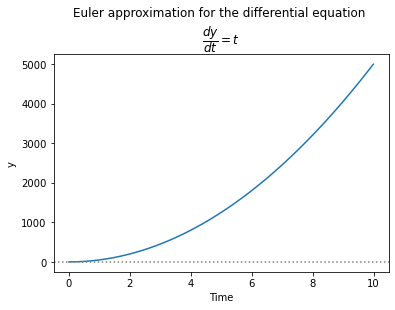

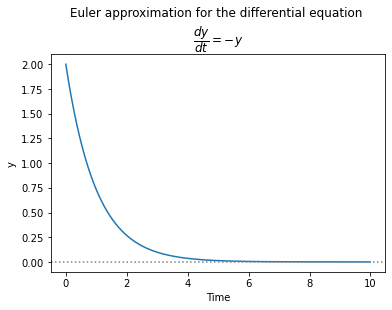

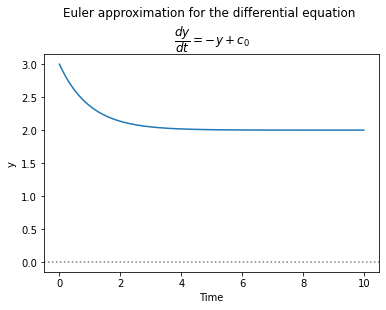

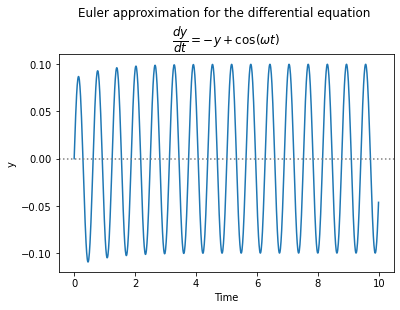

In [19]:
for f in APPROX.keys():
    plot_solution(APPROX[f], T, delta_t, title=FORMULAS[f])

## 	&#9320; Instability of the method

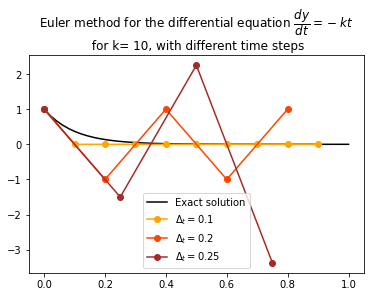

In [45]:
k = 10
y0 = 1
T2 = 1

def f_stiff(y, t, k=k):
    return -k*y

def y_exact(t, k=k, y0=y0):
    return y0*np.exp(-k*t)

TIME_STEPS = [1/10, 1/5, 1/4]
COLORS =  dict(zip(TIME_STEPS, ['orange', 'orangered', 'brown']))
APPROX_stiff = {}

for dt in TIME_STEPS:
    Y = Euler_method(f_stiff, y0, T=T2, delta_t=dt)
    APPROX_stiff[dt] = Y
    
fig, ax = plt.subplots()
# Exact solution
time_full = np.linspace(0, T2)
ax.plot(time_full, y_exact(time_full), color='k', label='Exact solution')
# Numerical approximations
for dt in TIME_STEPS:
    time = np.arange(0, T2, dt)
    ax.plot(time, APPROX_stiff[dt], marker='o', color=COLORS[dt], label=r'$\Delta_t =$'+str(dt))
ax.legend()
ax.set_title(r'Euler method for the differential equation $\dfrac{dy}{dt} = -kt$'+'\n for k= {}, with different time steps'.format(k))
plt.show()

## &#9325; Simulation of the Leaky Integrate-and-Fire model

In [88]:
Cm = 100e-12
gl = 10e-9
El = -70e-3
Vth = -50e-3
Vr = -80e-3
T3 = 0.2 # 1 s
delta_t = 1e-4

def dVmdt_LIF(Vm, I, gl=gl, Cm=Cm, El=El):
    return (-gl*(Vm - El) + I)/Cm

def Integrate_and_Fire(Iapp, Vr=Vr, Vth=Vth, T=T3, delta_t=delta_t):
    '''Simulation of the Leaky-Integrate-and-Fire model of point neuron.
    The evolution of the membrane potential is built by Euler's method from the reset potential to the threshold potential.
    Once the solution crosses the threshold, it is reset.
    Inputs:
        Iapp    (function)  Function of time specifying the input current.
        Vr      (float)     Reset potential.
        Vth     (float)     Threshold potential.
        T       (float)     Maximum time of integration.
        delta_t (float)     Time step, such that delta_t << T.
    Output:
        Vm       (list)     Simulated evolution of the membrane potential.
    '''
    Vm = [Vr] # starting at the reset potential
    for t in range(1, int(T/delta_t)): 
        vm = Vm[-1] + delta_t*dVmdt_LIF(Vm[-1], Iapp(t)) # evaluation of the derivative function with the approximated value at the previous time point
        if vm >= Vth: # reset
            Vm.append(Vr)
        else:
            Vm.append(vm)
    return Vm

In [91]:
CURRENTS = [0, 100e-12, 210e-12]
SIM = {}


for I0 in CURRENTS:
    
    def Iapp(t):
        return I0

    Vm = Integrate_and_Fire(Iapp)
    SIM[I0] = Vm

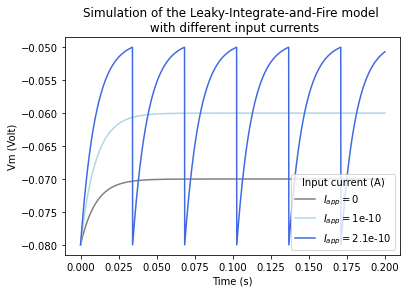

In [93]:
time = np.arange(0, T3, delta_t)
COLORS_I =  dict(zip(CURRENTS, ['gray', 'lightblue', 'royalblue', 'navy']))

fig, ax = plt.subplots()
for I0 in CURRENTS:
    ax.plot(time, SIM[I0], color=COLORS_I[I0], label=r'$I_{app} = $'+str(I0))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vm (Volt)')
ax.legend(title='Input current (A)')
ax.set_title('Simulation of the Leaky-Integrate-and-Fire model \n with different input currents')
plt.show()